In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

# %matplotlib inline
# %config Inlinebackend.figure_format= 'retina'
# sns.set_context("poster")
# sns.set(rc={"figure.figsize": (12.,6.)})
# sns.set_style("whitegrid")

In [2]:
attacks_filtered = pd.read_csv('../data/attacks_filtered.csv')


# First of all we are going to represent a boxplot with the top 5 countries by attack report


In [3]:
attacks_filtered["Country"].value_counts().head(7)




USA                 1986
AUSTRALIA           1076
SOUTH AFRICA         470
NEW ZEALAND          102
PAPUA NEW GUINEA     100
BRAZIL                85
BAHAMAS               82
Name: Country, dtype: int64

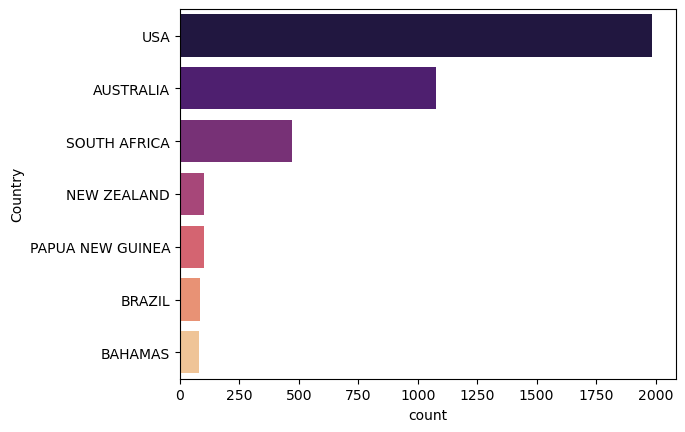

In [4]:
plot_1=sns.countplot(y= attacks_filtered.Country, order=attacks_filtered.Country.value_counts().iloc[:7].index, palette = "magma")
plot_1.figure.savefig("../images/Top7_countries.jpg", dpi=1000, bbox_inches = "tight")



<!-- # Relationship between activity and number of attacks -->

# Number of reports along the years

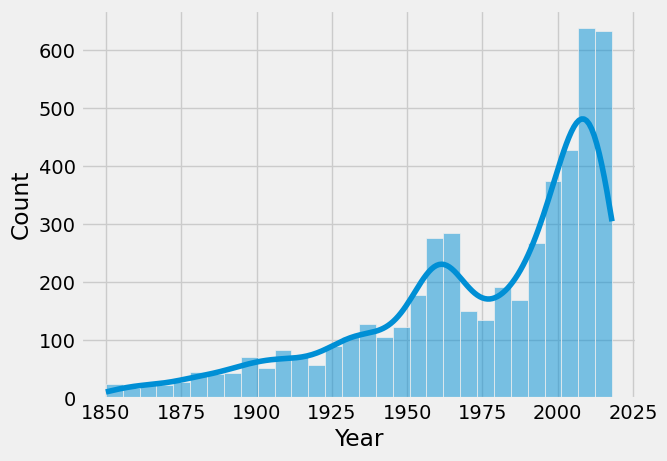

In [5]:
df = attacks_filtered[(attacks_filtered["Year"]>=1850)]

plt.style.use('fivethirtyeight')
plot_2 = sns.histplot(x=df.Year, bins=30, palette="magma", kde=True)
plot_2.figure.savefig("../images/reports_along_years.jpg", dpi=1000, bbox_inches = "tight")



# Relationship between month and number of reports


In [6]:
Month_dict = {
    "Jan":1,
    "Feb":2,
    "Mar":3,
    "Apr":4,
    "May":5,
    "Jun":6,
    "Jul":7,
    "Aug":8,
    "Sep":9,
    "Oct":10,
    "Nov":11,
    "Dec":12  
}

attacks_filtered.replace({"Month": Month_dict}, inplace=True)


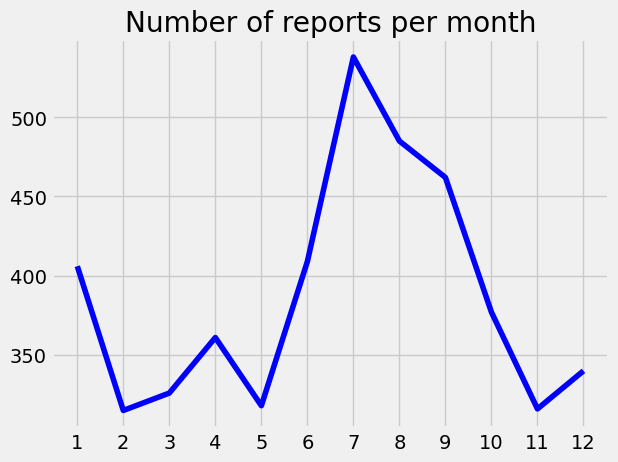

In [7]:
a = attacks_filtered.groupby("Month").indices.keys()
b = attacks_filtered.groupby("Month").size()

plt.style.use('fivethirtyeight')
plt.xticks(ticks = range(1,13))
plt.title("Number of reports per month", loc = 'center')
plt.rcParams["figure.figsize"] = (22,6)
plot_3 = plt.plot(a, b, "b")

plt.savefig("../images/month_number_reports.jpg", dpi=1000)

# Relationship between hour and number of attacks



In [8]:
attacks_filtered["Time"].value_counts()

Afternoon                              1555
Morning                                 951
Random or not clear time references     284
Nightime                                115
Name: Time, dtype: int64

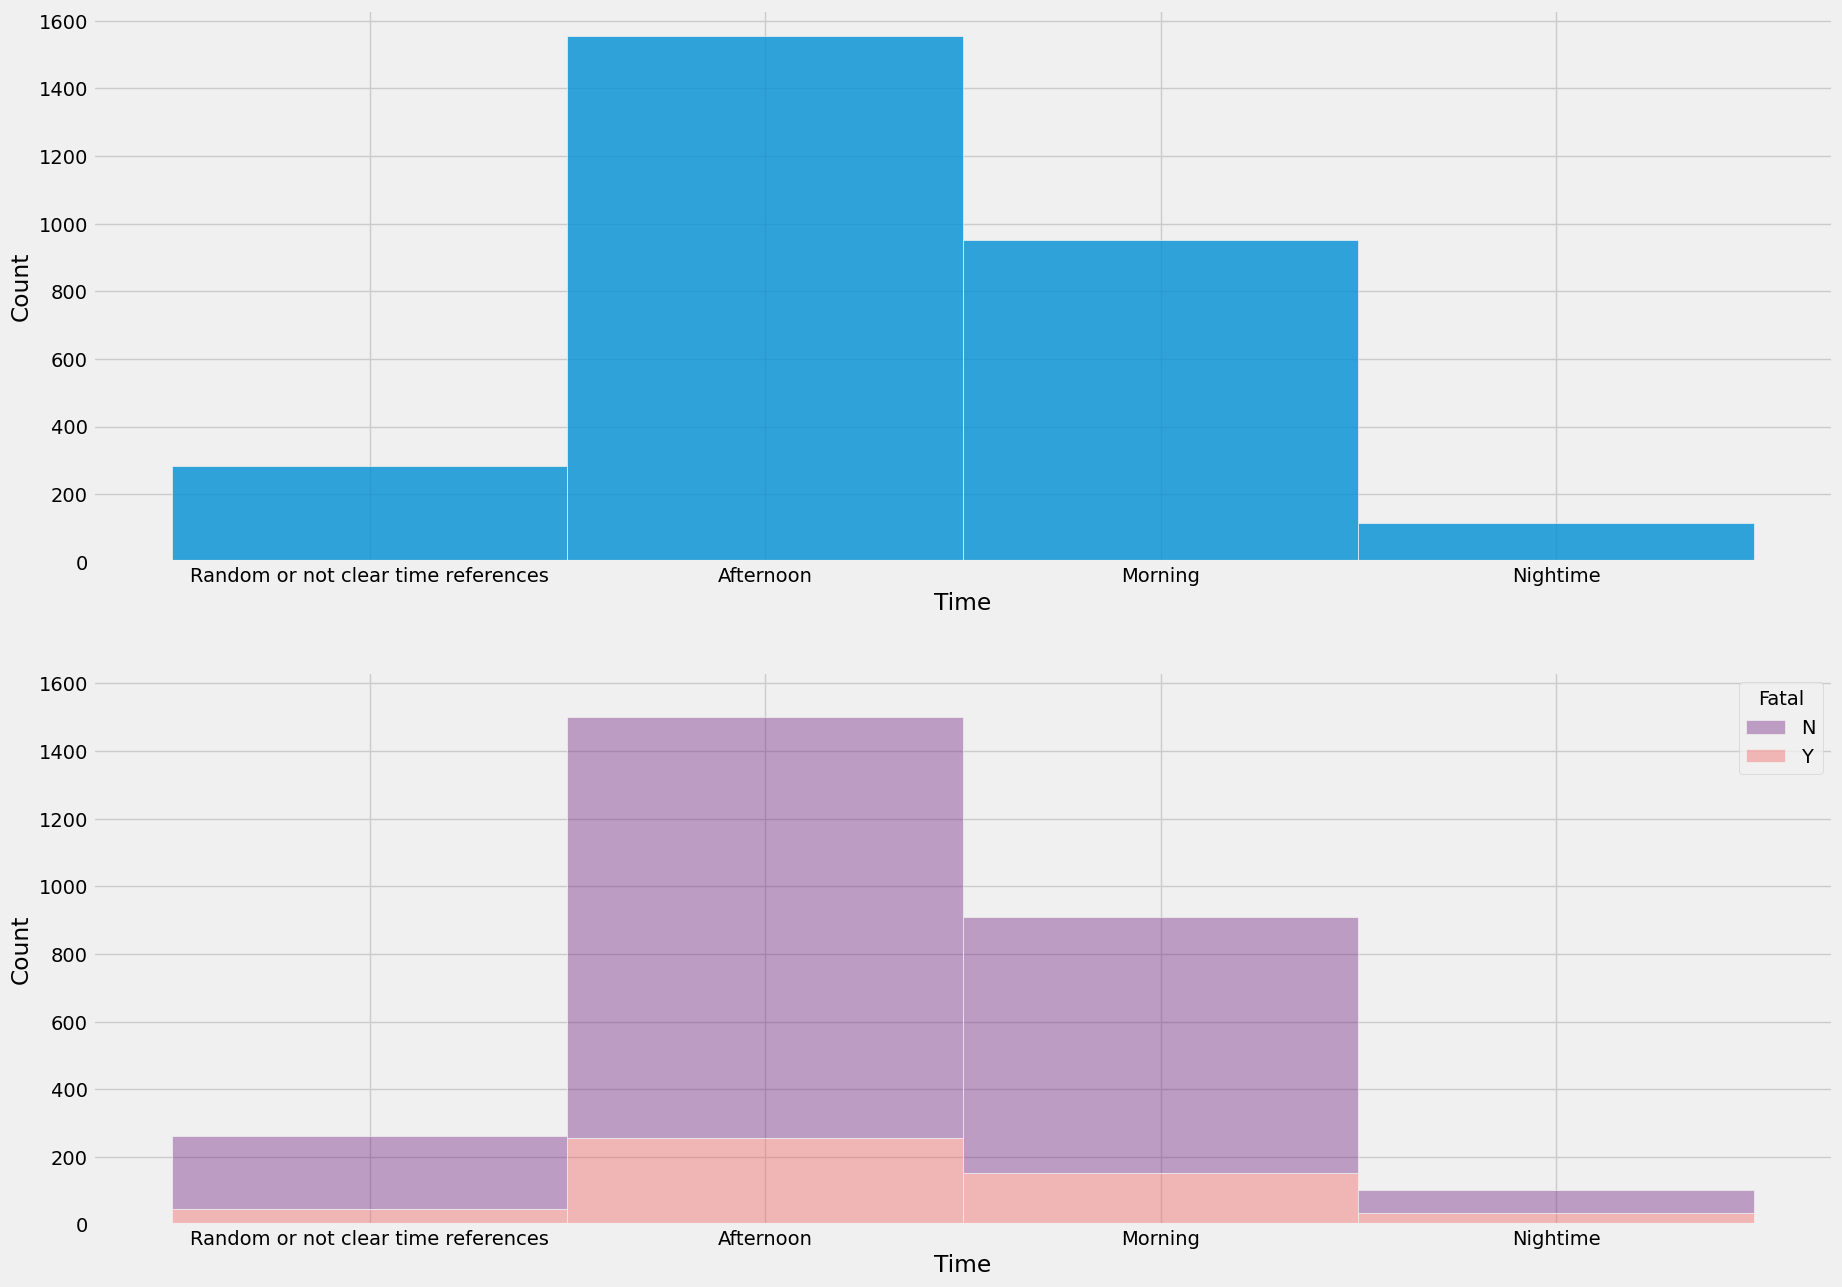

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,15), sharey = True)

plot_4_1 = sns.histplot(data=attacks_filtered, x="Time", ax=axs[0], palette="magma", alpha = 0.8)
# fig.figure.savefig("../images/plot_4_1.jpg", dpi=1000)
plot_4_2 =sns.histplot(data=attacks_filtered, x="Time", multiple="stack", hue= "Fatal", palette="magma", alpha = 0.4, ax=axs[1])
# fig.figure.savefig("../images/plot_4_2.jpg", dpi=1000)

fig.figure.savefig("../images/hours_number_attacks.jpg", dpi=1000)

# Relationship between activity, number of attacks and fatality

In [25]:
attacks_filtered["Activity"] = attacks_filtered["Activity"].value_counts().head(5)

In [21]:
Plot_5 = sns.histplot(data=attacks_filtered, x="Activity", multiple="stack", hue= "Fatal", palette="magma", alpha = 0.4, ax=axs[1])


# sns.histplot(data=attacks_filtered4, x=df, hue="Fatal", multiple="stack")

# plot_5.figure.savefig("../images/activity_attacks_fatality.jpg", dpi=1000)